# Assignment 6: Reduction of dimensionality and recognition

### Exercise 1: Direct PCA method

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#### a) Analytically compute eigenvectors and eigenvalues given four points.

#### b) Calculate and visualize PCA for 2D data from `points.txt`.

In [219]:
from a6_utils import *

In [84]:
def covariance_matrix(data: np.ndarray) -> np.ndarray:
    '''
        Calculates the covariance matrix
    '''
    
    cov_matrix = np.zeros((data.shape[1], data.shape[1]))
    for i in range(data.shape[1]):
        for j in range(data.shape[1]):
            cov_matrix[i,j] = np.sum((data[:, i] - np.mean(data[:, i])) * (data[:, j] - np.mean(data[:, j]))) / (data.shape[0] - 1)
    return cov_matrix

In [216]:
def pca(pts: np.ndarray) -> np.ndarray:
    '''
        Projects and reconstructs points with direct PCA algorithm
    '''

    mean = np.mean(pts, axis=0)
    centered = pts - mean

    print(centered)
            
    cov = covariance_matrix(centered.T)
    
    U,S,VT = np.linalg.svd(cov)
    S = S[:2]
    U = U[:, :]

    projected = np.matmul(U, centered)
    reconstructed = np.matmul(U, projected) + mean
    cov = np.cov(pts.T)
    
    return cov, reconstructed, (U[:, :2], S)

In [231]:
def pca(points, k):
    # Center the data
    mean = np.mean(points, axis=0)
    centered_data = points - mean

    # Compute the covariance matrix
    covariance_matrix = np.cov(centered_data.T)

    # Compute the eigenvectors and eigenvalues of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Sort the eigenvectors and eigenvalues in decreasing order of eigenvalue
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # Select the top k eigenvectors
    top_k_eigenvectors = eigenvectors[:, :k]

    # Project the centered data onto the principal components
    projected_data = centered_data @ top_k_eigenvectors

    # Calculate the mean and covariance of the projected data
    projected_mean = np.mean(projected_data, axis=0)
    projected_covariance = np.cov(projected_data.T)

    # Draw the representation of the Gaussian distribution
    drawEllipse(projected_mean, projected_covariance)

    return projected_data, projected_mean, projected_covariance


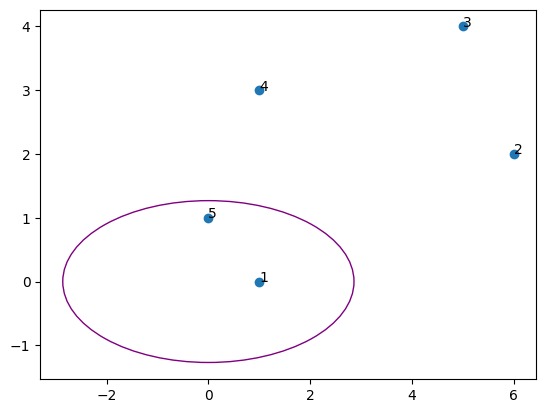

In [232]:

orig_points = np.loadtxt("data/points.txt")
points = orig_points.copy()

#cov, reconstructed, (eigenvectors, eigenvalues) = pca(points)
projected_data, projecte_mean, projected_cov = pca(points, 2)

#mu = (np.mean(reconstructed[:, 0]), np.mean(reconstructed[:, 1]))
#drawEllipse(projecte_mean, projected_cov)

plt.scatter(list(map(lambda x: x[0], points)), list(map(lambda x: x[1], points)))

for pt in range(len(points)):
    plt.annotate(pt+1, (points[pt][0], points[pt][1]))
